In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# divide data into chunks so computer can manage the data
df_chunk = pd.read_csv(r'data/bgg-15m-reviews.csv', 
                       header=0,
                       usecols=['user','ID','rating'],
                       chunksize=100000,
                       )

In [5]:
# concat TextReaderFile to 1 dataset
full_data = pd.concat(df_chunk)

In [6]:
full_data

,user,rating,ID
0,Torsten,10.0,30549
1,mitnachtKAUBO-I,10.0,30549
2,avlawn,10.0,30549
3,Mike Mayer,10.0,30549
4,Mease19,10.0,30549
...,...,...,...
15823264,Fafhrd65,8.0,281515
15823265,PlatinumOh,8.0,281515
15823266,BunkerBill,7.0,281515
15823267,Hattori Hanzo,6.0,281515


In [22]:
full_data.drop(full_data[full_data.user.isnull()].index, inplace=True)

In [28]:
full_data[full_data.user.isnull()]

,user,rating,ID


In [39]:
full_data[full_data['user'].isnull() == True]

,user,rating,ID


In [40]:
full_data.to_csv('data/user_rating_ID_non_null.csv')

In [17]:
full_data.comment.iloc[17]

'When this game first came out I followed it closely.  I even listened to a Google Talk that the designer of the game gave.  Honestly, I didn\'t get it.  I couldn\'t tell if it was just another one of these co-ops that ends up being *essentially* "Go Fish" (e.g., Lord of the Rings, Shadows over Camelot).  Also, there were reviewers who were writing that every play was obvious and mechanical.  Well, I played this for the first time at GenCon \'09.  Z-Man had sold out by the end of Saturday, so I bought a copy as soon as I got home.  It\'s that kind of game.  In ease of rules to interesting outcomes, I\'d rate it similarly to Ticket to Ride.  The rules are incredibly simple, and very, very tight.  What the rules don\'t capture, though is that ambiguous dimension of tension.  Some games are able to produce it, some aren\'t.  Pandemic\'s the latter.  This was true of a bunch of adults (at GenCon), and has been true with my two daughters (11 and 14).  It\'s a similar feeling to Twilight Str

In [6]:
board_games = full_data.groupby(by ='name',).count().reset_index()
board_games.head()

,name,user,rating,comment,ID
0,"""La Garde recule!""",34,34,14,34
1,"""Oh My God! There's An Axe In My Head."" The Ga...",79,79,22,79
2,"""Scratch One Flat Top!""",46,46,20,46
3,"""Tarleton's Quarter!""",44,44,19,44
4,#MyLife,46,46,7,46


In [9]:
board_games.sort_values(by= 'ID',ascending=False).head(10)

,name,user,rating,comment,ID
11647,Pandemic,96234,96234,13482,96234
2792,Carcassonne,96220,96221,15472,96221
2957,Catan,96184,96185,15388,96185
328,7 Wonders,79870,79870,11367,79870
4761,Dominion,74953,74954,11334,74954
16716,Ticket to Ride,67980,67981,10715,67981
3451,Codenames,62576,62576,7017,62576
660,Agricola,61601,61601,10780,61601
12445,Puerto Rico,61157,61158,10261,61158
14265,Small World,59217,59217,7970,59217


[Text(0, 0, 'Pandemic'),
 Text(1, 0, 'Carcassonne'),
 Text(2, 0, 'Catan'),
 Text(3, 0, '7 Wonders'),
 Text(4, 0, 'Dominion'),
 Text(5, 0, 'Ticket to Ride'),
 Text(6, 0, 'Codenames'),
 Text(7, 0, 'Agricola'),
 Text(8, 0, 'Puerto Rico'),
 Text(9, 0, 'Small World')]

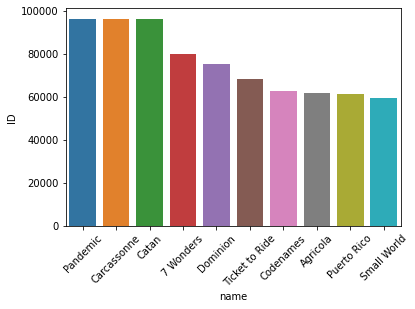

In [14]:
ax = sns.barplot(x="name", y="ID", data=board_games.sort_values(by= 'ID',ascending=False).head(10))


ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.sabe

[Text(0, 0, 'POK'),
 Text(1, 0, 'Energi'),
 Text(2, 0, 'Top Ten: The Bill of Rights'),
 Text(3, 0, 'Embers of Memory: A Throne of Glass Game'),
 Text(4, 0, 'UBike Tour: Taiwan'),
 Text(5, 0, 'Storytelling'),
 Text(6, 0, 'Beyond Humanity: Colonies'),
 Text(7, 0, 'Pancake Pile-Up'),
 Text(8, 0, 'Stop it!'),
 Text(9, 0, 'Just a Peiper Dream?')]

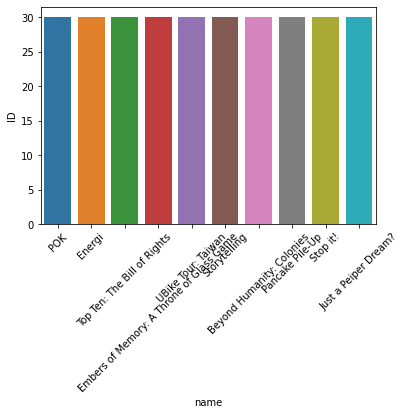

In [15]:
ax = sns.barplot(x="name", y="ID", data=board_games.sort_values(by= 'ID',ascending=False).tail(10))


ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [14]:
board_games_avg = full_data.groupby(by ='name').agg(['mean','count']).reset_index()
board_games_avg.head()

name    rating        \
                                                          mean count   
0                                 "La Garde recule!"  5.404412    34   
1  "Oh My God! There's An Axe In My Head." The Ga...  5.905570    79   
2                            "Scratch One Flat Top!"  7.390652    46   
3                              "Tarleton's Quarter!"  7.022727    44   
4                                            #MyLife  5.655435    46   

         ID        
       mean count  
0  122711.0    34  
1   23304.0    79  
2    4016.0    46  
3   38836.0    44  
4  286535.0    46

In [35]:
board_games_avg[('rating', 'count')] 

0        34
1        79
2        46
3        44
4        46
         ..
18979    39
18980    33
18981    40
18982    50
18983    39
Name: (rating, count), Length: 18984, dtype: int64

In [15]:
board_games_avg.columns

MultiIndex([(  'name',      ''),
            ('rating',  'mean'),
            ('rating', 'count'),
            (    'ID',  'mean'),
            (    'ID', 'count')],
           )

In [18]:
board_games_avg.sort_values(by= ('rating',  'mean'),ascending=False).head(10)

name    rating              ID  \
                                                      mean count      mean   
579                                       Aeolis  9.687500    32  281257.0   
5083   Dungeon Crusade: Book I – Genesis of Evil  9.565405    37  147635.0   
16686                         Thug Life the Game  9.392857    42  211693.0   
15612                                TerroriXico  9.380282    71  228370.0   
3610                   Conqueror: Final Conquest  9.360000    35  294788.0   
18400                    Wings of the Motherland  9.331081    74   85147.0   
5116                         Dungeon Universalis  9.291042   355  261393.0   
4486                                Dice Masters  9.286364    44  295574.0   
7983                           Infinity Defiance  9.279436    67  285853.0   
17981             War Titans: Invaders Must Die!  9.266667    60  207203.0   

             
      count  
579      32  
5083     37  
16686    42  
15612    71  
3610     35  
18400    74  
5116    355  
4486     44  
7983     67  
17981    60

In [17]:
board_games_avg.sort_values(by= ('rating',  'mean'),ascending=True).head(10)

name    rating              ID      
                                             mean count      mean count
11368       Oneupmanship: Mine's Bigger  1.048437    64  144110.0    64
767               Alien: USCSS Nostromo  1.231933   119  276022.0   119
13182          Rock Paper Scissors Game  1.320000    30   19377.0    30
17902                             W.W.B  1.416667    42   99918.0    42
10597                      Ms. Monopoly  1.466667    30  289363.0    30
11549            Overturn: Rising Sands  1.518987    79  240624.0    79
8020   Intelligent Design vs. Evolution  1.523729    59   28257.0    59
2387                            BreaKey  1.537209    43   18044.0    43
6738                    Global Survival  1.934322   118    2502.0   118
15166                       Super Deck!  2.053288    73    3504.0    73

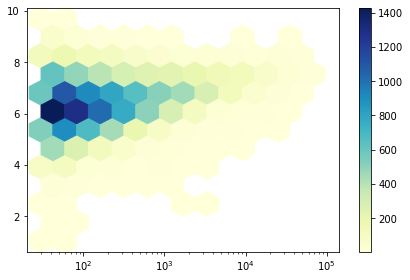

In [78]:
hb = plt.hexbin(board_games_avg[('rating', 'count')],board_games_avg[('rating',  'mean')],xscale ='log',cmap='YlGnBu',gridsize=12, mincnt=2,)
cb = plt.colorbar(hb)  


In [82]:
# create dataframe for agg data 

agg_data = pd.read_csv('data/2020-08-19.csv')
agg_data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Year', 'Rank', 'Average', 'Bayes average',
       'Users rated', 'URL', 'Thumbnail'],
      dtype='object')

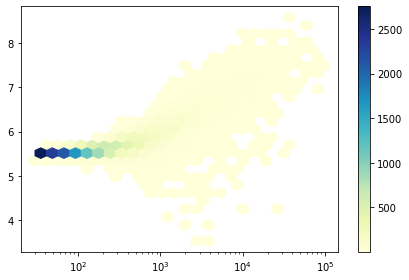

In [99]:
hb = plt.hexbin(agg_data['Users rated'],agg_data['Bayes average'],xscale ='log',cmap='YlGnBu',gridsize=25, mincnt=0.25,)
cb = plt.colorbar(hb)  

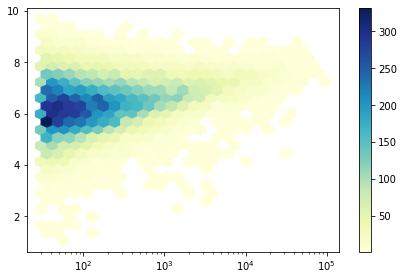

In [98]:
hb = plt.hexbin(agg_data['Users rated'],agg_data['Average'],xscale ='log',cmap='YlGnBu',gridsize=25, mincnt=0.25,)
cb = plt.colorbar(hb)  

## ONLY USER RATINGS and GAME ID

In [4]:
user_game_rating = full_data[['user','ID','rating']]

## Distribution of Number of Rating Per User

In [17]:
data = user_game_rating.groupby('user').count()

user
 Fu_Koios             2
 beastvol             9
 mycroft             14
 woh                  5
(mostly) harmless     1
Name: rating, dtype: int64

In [35]:
data[data.rating == max(data.rating)]

,ID,rating
user,,
leffe dubbel,6027,6027


In [41]:
user_game_rating[user_game_rating['user']=='leffe dubbel']

,user,ID,rating
671683,leffe dubbel,102794,9.0
802542,leffe dubbel,201808,8.0
841077,leffe dubbel,124742,9.0
947277,leffe dubbel,10547,8.0
991706,leffe dubbel,9220,7.0
...,...,...,...
15772901,leffe dubbel,122961,9.0
15780382,leffe dubbel,8740,6.0
15782488,leffe dubbel,204681,6.0
15782785,leffe dubbel,196234,8.0


<AxesSubplot:xlabel='rating'>

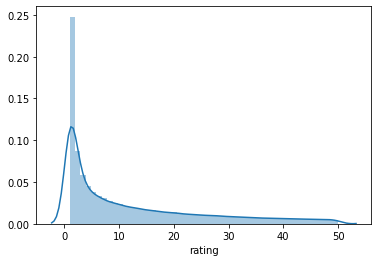

In [33]:
sns.distplot(data.rating[data.rating <= 50])

<AxesSubplot:xlabel='rating'>

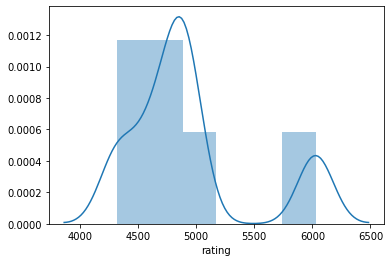

In [32]:
sns.distplot(data.rating[data.rating >= 4000])

## Meta Data EDA

In [3]:
meta_data = pd.read_csv('data/games_detailed_info.csv',index_col = 'Unnamed: 0')

In [5]:
meta_data.shape

(19230, 55)

In [178]:
k = meta_data.boardgamecategory[0].replace("'",'').replace('[','').replace(']','').split(',')


['Medical']

In [ ]:
list_of_categories = []
for i in meta_data.boardgamecategory.tolist():
    print(i.replace)
    k = i.replace("'",'').replace('[','').replace(']','').split(',')

## Inital Model

In [12]:
from surprise import Reader
from surprise.dataset import Dataset
from surprise.model_selection import cross_validate
from surprise import SVD

In [6]:
reader = Reader(rating_scale = (0,10))

In [7]:
data = Dataset.load_from_df(user_game_rating,reader)

In [ ]:
cross_validate(SVD(), data, measures=['RMSE'], cv=3, verbose=False)